In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

from IPython.display import HTML, display
import tabulate

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
im = Image.open('../DB/test/Bowl/BowlPlace6Subject4_2_bboxes_157_0.png')

In [3]:
model = tf.keras.models.load_model('../models/custom_13_12_2020', custom_objects=None, compile=True, options=None)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory('../DB/train', batch_size = 128, class_mode = 'categorical', target_size = (im.width, im.height))
test_generator = test_datagen.flow_from_directory('../DB/test', batch_size = 128, class_mode = 'categorical', target_size = (im.width, im.height))

Found 4736 images belonging to 5 classes.
Found 3568 images belonging to 5 classes.


In [35]:
i = 0
threshold = 0.7
bad_images = []
bad_labels = []

for image, y in test_generator:
    i += 1
    # image_to_test = image[0][0]
    prediction = model.predict(image)
    idx_pred = np.argmax(prediction, axis=1)
    true = np.argmax(y, axis=1)
    
    realy_bad = np.max(prediction, axis=1) > 0.9
    
    bad_results = (idx_pred != true) == realy_bad
    
    bad = image[bad_results]
    bad_lab = y[bad_results]
    for im in bad:
        bad_images.append(im)
        #bad_labels.append
        
    if i == 5: break

len(bad_images)

28

In [36]:
def display_images(images, n_line, l_col):
    plt.figure(figsize=(10, 10))
    for i in range(n_line*l_col):
        ax = plt.subplot(n_line, l_col, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

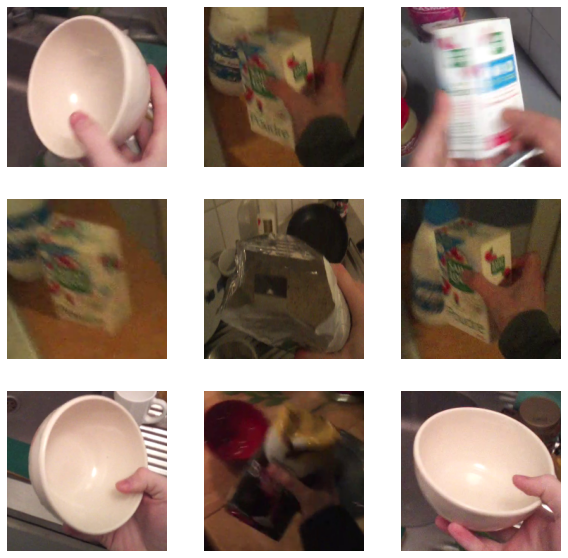

In [37]:
display_images(bad_images, 3, 3)